In [1]:
import joblib
import matplotlib.pyplot as plt
import timeit
from solcast_frames.latlng import LatLng
from solcast_frames.radiationframehandler import RadiationFrameHandler
import pandas as pd
import datetime

In [2]:
!echo $SOLCAST_API_KEY

cjSdWPdMP5_5ecpLShxC8lh-orTUj_ig


In [3]:
multixgbmodel = joblib.load('xgboost.pickle')

In [4]:
plt.interactive(False) # Turn this off to create plots
location1 = LatLng(lat=37.4772, lng=126.6249, name="Incheon", tag="", timezone="Asia/Seoul")
location2 = LatLng(lat=35.10468, lng=129.0323, name="Busan", tag="", timezone="Asia/Seoul")
print(location1.desc())
print(location2.desc())

Name: Incheon Tag: [37.477200, 126.624900] TimeZone: Asia/Seoul
Name: Busan Tag: [35.104680, 129.032300] TimeZone: Asia/Seoul


In [5]:
fx_solcast_radiation1 = RadiationFrameHandler.forecast(location1)
# fx_solcast_radiation1.ghi.plot()
# plt.show()

In [6]:
fx_solcast_radiation2 = RadiationFrameHandler.forecast(location2)
# fx_solcast_radiation2.ghi.plot()
# plt.show()

In [7]:
# fx_solcast_radiation1.index = fx_solcast_radiation1.index.tz_convert('Asia/Seoul')

In [8]:
# fx_solcast_radiation2.index = fx_solcast_radiation2.index.tz_convert('Asia/Seoul')

In [9]:
fx_solcast_radiation1

,ghi,ghi90,ghi10,ebh,dni,dni10,dni90,dhi,air_temp,zenith,azimuth,cloud_opacity,period
period_end,,,,,,,,,,,,,
2021-08-13 07:30:00+00:00,251,404,144,19,32,4,249,231,26,52,100,48,0 days 00:30:00
2021-08-13 08:00:00+00:00,248,347,117,33,65,4,267,213,26,58,95,37,0 days 00:30:00
2021-08-13 08:30:00+00:00,200,276,93,26,60,4,229,174,26,64,90,35,0 days 00:30:00
2021-08-13 09:00:00+00:00,142,192,77,18,54,7,163,123,26,70,86,35,0 days 00:30:00
2021-08-13 09:30:00+00:00,85,111,43,8,33,5,88,76,26,76,81,36,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20 05:00:00+00:00,434,789,32,36,41,0,638,397,26,29,144,45,0 days 00:30:00
2021-08-20 05:30:00+00:00,428,757,30,41,49,0,650,386,26,33,132,43,0 days 00:30:00
2021-08-20 06:00:00+00:00,407,704,28,42,53,0,624,364,27,37,122,42,0 days 00:30:00


In [10]:
fx_solcast_radiation2

,ghi,ghi90,ghi10,ebh,dni,dni10,dni90,dhi,air_temp,zenith,azimuth,cloud_opacity,period
period_end,,,,,,,,,,,,,
2021-08-13 07:30:00+00:00,221,305,33,11,19,0,67,209,24,54,97,56,0 days 00:30:00
2021-08-13 08:00:00+00:00,179,243,33,8,17,0,56,170,24,60,92,56,0 days 00:30:00
2021-08-13 08:30:00+00:00,115,183,10,4,9,0,48,111,24,66,88,62,0 days 00:30:00
2021-08-13 09:00:00+00:00,78,144,9,2,9,0,66,75,24,72,84,64,0 days 00:30:00
2021-08-13 09:30:00+00:00,53,74,10,2,12,0,36,50,24,79,79,57,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20 05:00:00+00:00,655,830,224,248,281,4,712,406,28,28,137,21,0 days 00:30:00
2021-08-20 05:30:00+00:00,630,785,223,260,310,5,712,369,28,33,126,19,0 days 00:30:00
2021-08-20 06:00:00+00:00,585,726,215,245,311,6,692,339,28,38,117,19,0 days 00:30:00


In [11]:
fx_solcast_radiation1_resample = fx_solcast_radiation1.resample('1H').sum()
fx_solcast_radiation1_resample

,ghi,ghi90,ghi10,ebh,dni,dni10,dni90,dhi,air_temp,zenith,azimuth,cloud_opacity
period_end,,,,,,,,,,,,
2021-08-13 07:00:00+00:00,251,404,144,19,32,4,249,231,26,52,100,48
2021-08-13 08:00:00+00:00,448,623,210,59,125,8,496,387,52,122,185,72
2021-08-13 09:00:00+00:00,227,303,120,26,87,12,251,199,52,146,167,71
2021-08-13 10:00:00+00:00,44,62,19,2,16,1,46,42,52,170,150,96
2021-08-13 11:00:00+00:00,0,0,0,0,0,0,0,0,52,192,131,118
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20 03:00:00+00:00,781,1571,65,39,43,0,1119,742,52,52,-318,104
2021-08-20 04:00:00+00:00,839,1624,66,53,59,0,1243,786,52,51,335,98
2021-08-20 05:00:00+00:00,862,1546,62,77,90,0,1288,783,52,62,276,88


In [12]:
fx_solcast_radiation2_resample = fx_solcast_radiation2.resample('1H').sum()
fx_solcast_radiation2_resample

,ghi,ghi90,ghi10,ebh,dni,dni10,dni90,dhi,air_temp,zenith,azimuth,cloud_opacity
period_end,,,,,,,,,,,,
2021-08-13 07:00:00+00:00,221,305,33,11,19,0,67,209,24,54,97,56
2021-08-13 08:00:00+00:00,294,426,43,12,26,0,104,281,48,126,180,118
2021-08-13 09:00:00+00:00,131,218,19,4,21,0,102,125,48,151,163,121
2021-08-13 10:00:00+00:00,19,32,5,0,2,0,15,19,48,175,146,132
2021-08-13 11:00:00+00:00,0,0,0,0,0,0,0,0,48,198,129,139
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20 03:00:00+00:00,1330,1744,380,427,464,3,1427,903,56,46,-326,46
2021-08-20 04:00:00+00:00,1352,1738,432,478,520,5,1422,874,56,46,320,43
2021-08-20 05:00:00+00:00,1285,1615,447,508,591,9,1424,775,56,61,263,40


In [13]:
fx_solcast_radiation3_resample = fx_solcast_radiation2_resample

In [14]:
fx_solcast_radiation3_resample['month'] = fx_solcast_radiation3_resample.index.month
fx_solcast_radiation3_resample['day'] = fx_solcast_radiation3_resample.index.month
fx_solcast_radiation3_resample['hour'] = fx_solcast_radiation3_resample.index.month
fx_solcast_radiation3_resample['dayofyear'] = fx_solcast_radiation3_resample.index.month

In [15]:
radiation_full = pd.concat([fx_solcast_radiation1_resample[['ghi','ebh','dni','dhi','air_temp','zenith','azimuth','cloud_opacity']], fx_solcast_radiation2_resample[['ghi','ebh','dni','dhi','air_temp','zenith','azimuth','cloud_opacity']], fx_solcast_radiation3_resample[['ghi','ebh','dni','dhi','air_temp','zenith','azimuth','cloud_opacity','month','day','hour','dayofyear']]], axis=1)
radiation_full


,ghi,ebh,dni,dhi,air_temp,zenith,azimuth,cloud_opacity,ghi,ebh,...,dni,dhi,air_temp,zenith,azimuth,cloud_opacity,month,day,hour,dayofyear
period_end,,,,,,,,,,,,,,,,,,,,,
2021-08-13 07:00:00+00:00,251,19,32,231,26,52,100,48,221,11,...,19,209,24,54,97,56,8,8,8,8
2021-08-13 08:00:00+00:00,448,59,125,387,52,122,185,72,294,12,...,26,281,48,126,180,118,8,8,8,8
2021-08-13 09:00:00+00:00,227,26,87,199,52,146,167,71,131,4,...,21,125,48,151,163,121,8,8,8,8
2021-08-13 10:00:00+00:00,44,2,16,42,52,170,150,96,19,0,...,2,19,48,175,146,132,8,8,8,8
2021-08-13 11:00:00+00:00,0,0,0,0,52,192,131,118,0,0,...,0,0,48,198,129,139,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20 03:00:00+00:00,781,39,43,742,52,52,-318,104,1330,427,...,464,903,56,46,-326,46,8,8,8,8
2021-08-20 04:00:00+00:00,839,53,59,786,52,51,335,98,1352,478,...,520,874,56,46,320,43,8,8,8,8
2021-08-20 05:00:00+00:00,862,77,90,783,52,62,276,88,1285,508,...,591,775,56,61,263,40,8,8,8,8


In [16]:
# radiation_full.loc['2021-08-14']['ghi']

In [17]:
y_pred_multixgb = multixgbmodel.predict(radiation_full).reshape(-1,3)
df_y_pred_multixgb = pd.DataFrame(data=y_pred_multixgb, index=radiation_full.index, columns=['발전량(신인천소내)','발전량(부산복합자재창고)','발전량(부산신항)'])

/Users/itd/opt/anaconda3/envs/fbprophet/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [18]:
df_y_pred_multixgb

,발전량(신인천소내),발전량(부산복합자재창고),발전량(부산신항)
period_end,,,
2021-08-13 07:00:00+00:00,35.064587,23.514217,17.377272
2021-08-13 08:00:00+00:00,137.314850,39.760517,31.515574
2021-08-13 09:00:00+00:00,89.697685,44.211040,22.852718
2021-08-13 10:00:00+00:00,42.480854,32.332806,24.210182
2021-08-13 11:00:00+00:00,40.830837,34.368980,20.613264
...,...,...,...
2021-08-20 03:00:00+00:00,24.017796,23.350182,27.852053
2021-08-20 04:00:00+00:00,87.635849,62.053776,49.060070
2021-08-20 05:00:00+00:00,122.109024,67.597588,62.615192


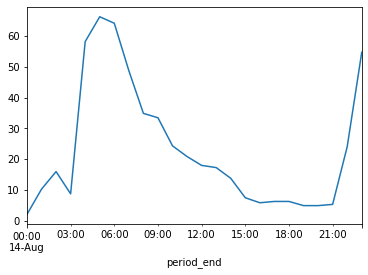

In [23]:
df_y_pred_multixgb['발전량(부산신항)'].loc['2021-08-14'].plot()
plt.show()